In [15]:
import pandas as pd
import seaborn as sns
import numpy as np

## Aggregation and Grouping

In [13]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

### Simple Aggregation in Pandas

In [16]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [17]:
ser.mean()

0.5623850983416314

In [18]:
ser.sum()

2.811925491708157

In [19]:
df = pd.DataFrame({'A':rng.rand(5),
                   'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [20]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [22]:
df.mean(axis = 'columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [24]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine

### split, apply , combine

* The split step involves breaking up and grouping a DataFrame depending on the
  value of the specified key.
* The apply step involves computing some function, usually an aggregate, transfor‐
  mation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

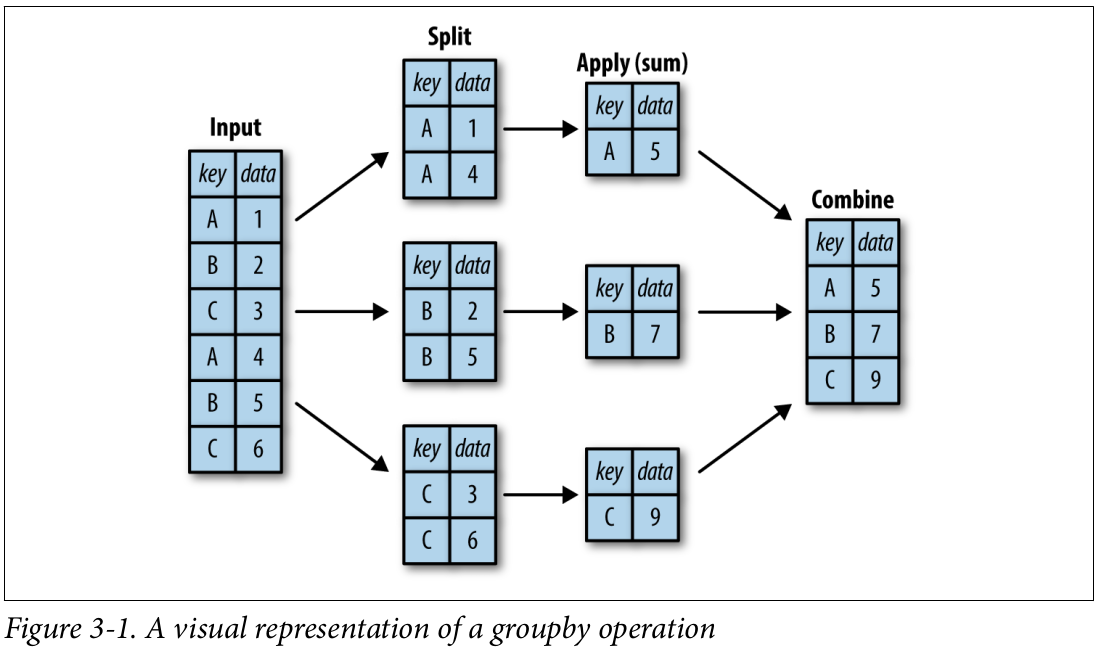

In [28]:
from IPython.display import Image
Image("data/split-apply-combine.png", width = '700', height='400')

In [31]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [33]:
df.groupby('key')

In [34]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### The GroupBy Object

- most important operations made available by a GroupBy are aggregate, filter, transform, and apply

#### Column Indexing

GroupBy objects supports column indexing like in DataFrame

In [38]:
planets.groupby('method')

In [45]:
planets.groupby('method')['orbital_period'] # using column indexing

In [44]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

#### Iteration over Groups

In [58]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in apply functionality, which we will discuss momentarily.

#### Dispatch method

Any method not explicitly implemented by the GroupBy object will be passed through and called on the groups

In [81]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Looking at this data helps us better understand the data.
This is just one example of the utility of dispatch methods.

#### Aggregate, Filter, Transform , Apply

In [85]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                   'data1':range(6),
                   'data2':rng.randint(0,10,6)})
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregate

In [90]:
# groupby aggregate method allows string, function, a list and compute all at once

df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [91]:
# Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [92]:
df.groupby('key').aggregate({'data1':'min',
                             'data2': max})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

- A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is
larger than some critical value:

In [93]:
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


In [94]:
print(df.groupby('key').filter(filter_func))

  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


Group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

- While aggregation must return a reduced version of the data,Tranformation can return some transformed version of the full data to recombine.
- A common example is to center the data by subtracting the group-wise mean:

In [96]:
df.groupby('key').transform(lambda x:x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### Apply

- The apply() method lets you apply an arbitrary function to the group results.

In [100]:
#here is an apply() that normalizes the first column by the sum of the second:

def norm_by_data2(x):
    #x is a dataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


apply() within a GroupBy is quite flexible: the only criterion is that the function takes
a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to
you!

### Specifying the split key

##### A list, array, series, or index providing the grouping keys

- The key can be any series or list with a length matching that of the DataFrame  

In [102]:
L = [0,1,0,1,2,0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [103]:
print(df.groupby(df['key']).sum())

     data1  data2
key              
A        3      8
B        5      7
C        7     12


##### A dictionary or series mapping index to group

- Another method is to provide a dictionary that maps index values to the group keys.

In [109]:
df2 = df.set_index('key')
mapping = {'A':'Vowel', 'B':'Consonant', 'C':'Consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
Consonant     12     19
Vowel          3      8


##### Any Python Function

- Similar to mapping, you can pass any Python function that will input the index value and output the group.

In [110]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


##### A List of Valid Keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [111]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,Vowel,1.5,4.0
b,Consonant,2.5,3.5
c,Consonant,3.5,6.0


### Grouping Example

- Counting discovered planets by method and by decade

In [139]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
decade.head()

0    2000s
1    2000s
2    2010s
3    2000s
4    2000s
Name: decade, dtype: object

In [150]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
